## IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATASET 

In [2]:
df = pd.read_csv("AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [5]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

## DIVIDING DATETIME INDEX

In [6]:
new_df = df
#Creating new columns named as Month, Year, Date, Time, Week and Day and extracting fields from Datetime column

new_df["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
new_df["Month"] = pd.to_datetime(df["Datetime"]).dt.month
new_df["Year"] = pd.to_datetime(df["Datetime"]).dt.year
new_df["Date"] = pd.to_datetime(df["Datetime"]).dt.date
new_df["Time"] = pd.to_datetime(df["Datetime"]).dt.time
new_df["Week"] = pd.to_datetime(df["Datetime"]).dt.week

#Setting the index to Datetime
new_df = df.set_index("Datetime")

new_df.head()

<ipython-input-6-84bc5875fbe8>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_df["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Day,Month,Year,Date,Time,Week
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,Friday,12,2004,2004-12-31,01:00:00,53
2004-12-31 02:00:00,12865.0,Friday,12,2004,2004-12-31,02:00:00,53
2004-12-31 03:00:00,12577.0,Friday,12,2004,2004-12-31,03:00:00,53
2004-12-31 04:00:00,12517.0,Friday,12,2004,2004-12-31,04:00:00,53
2004-12-31 05:00:00,12670.0,Friday,12,2004,2004-12-31,05:00:00,53


In [7]:
#Total number of unique years
df.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

## VISUALISING ENERGY CONSUMPTION PER YEAR

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

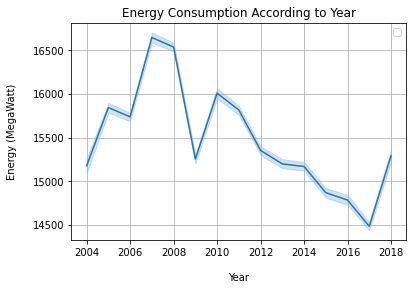

In [9]:
sns.lineplot(x=new_df["Year"], y=new_df["AEP_MW"], data=new_df)

plt.xlabel("\nYear")
plt.ylabel("Energy (MegaWatt)\n")
plt.grid(True)
plt.legend()

plt.title("Energy Consumption According to Year")

## VISUALISING ENERGY CONSUMPTION WITH TIME

In [10]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


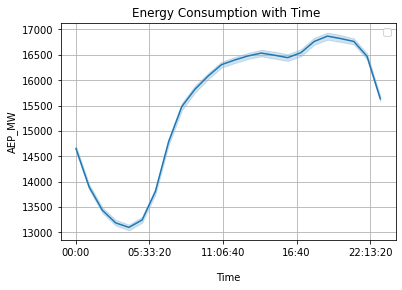

In [11]:
sns.lineplot(x=new_df["Time"], y=new_df["AEP_MW"], data=df)
plt.title("Energy Consumption with Time ")
plt.xlabel("\nTime")
plt.grid(True)
plt.legend()

## RESAMPLING

In [12]:
print(new_df)
new_df.index = pd.to_datetime(new_df.index)
NewDataSet = new_df.resample('D').mean()
NewDataSet

                      AEP_MW      Day  Month  Year        Date      Time  Week
Datetime                                                                      
2004-12-31 01:00:00  13478.0   Friday     12  2004  2004-12-31  01:00:00    53
2004-12-31 02:00:00  12865.0   Friday     12  2004  2004-12-31  02:00:00    53
2004-12-31 03:00:00  12577.0   Friday     12  2004  2004-12-31  03:00:00    53
2004-12-31 04:00:00  12517.0   Friday     12  2004  2004-12-31  04:00:00    53
2004-12-31 05:00:00  12670.0   Friday     12  2004  2004-12-31  05:00:00    53
...                      ...      ...    ...   ...         ...       ...   ...
2018-01-01 20:00:00  21089.0   Monday      1  2018  2018-01-01  20:00:00     1
2018-01-01 21:00:00  20999.0   Monday      1  2018  2018-01-01  21:00:00     1
2018-01-01 22:00:00  20820.0   Monday      1  2018  2018-01-01  22:00:00     1
2018-01-01 23:00:00  20415.0   Monday      1  2018  2018-01-01  23:00:00     1
2018-01-02 00:00:00  19993.0  Tuesday      1  2018  

,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10,2004,40
2004-10-02,12999.875000,10,2004,40
2004-10-03,12227.083333,10,2004,40
2004-10-04,14309.041667,10,2004,41
2004-10-05,14439.708333,10,2004,41
...,...,...,...,...
2018-07-30,15368.083333,7,2018,31
2018-07-31,15180.291667,7,2018,31
2018-08-01,15151.166667,8,2018,31


## TEST-TRAIN SPLITTING

In [13]:
Training_Set = NewDataSet.iloc[:,0:1]
print(Training_Set)
TestData = NewDataSet.tail(100)
print(TestData)
Training_Set = Training_Set[:-60]
print(Training_Set)

                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333
...                  ...
2018-07-30  15368.083333
2018-07-31  15180.291667
2018-08-01  15151.166667
2018-08-02  15687.666667
2018-08-03  14809.000000

[5055 rows x 1 columns]
                  AEP_MW  Month  Year  Week
Datetime                                   
2018-04-26  13157.791667      4  2018    17
2018-04-27  12964.000000      4  2018    17
2018-04-28  12237.583333      4  2018    17
2018-04-29  12156.791667      4  2018    17
2018-04-30  13443.500000      4  2018    18
...                  ...    ...   ...   ...
2018-07-30  15368.083333      7  2018    31
2018-07-31  15180.291667      7  2018    31
2018-08-01  15151.166667      8  2018    31
2018-08-02  15687.666667      8  2018    31
2018-08-03  14809.000000      8  2018    31

[100 rows x 4 columns]
                  AEP_MW
Datetime                
2004

## FEATURE SCALING

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Train = sc.fit_transform(Training_Set)

## MODEL

In [15]:
X_Train = []
Y_Train = []

# Range should be from 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mse',)

In [17]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 21s 133ms/step - loss: 0.02291s -
Epoch 2/50
155/155 [==============================] - 21s 137ms/step - loss: 0.0181
Epoch 3/50
155/155 [==============================] - 21s 136ms/step - loss: 0.0175
Epoch 4/50
155/155 [==============================] - 22s 139ms/step - loss: 0.0163
Epoch 5/50
155/155 [==============================] - 22s 139ms/step - loss: 0.0160
Epoch 6/50
155/155 [==============================] - 21s 133ms/step - loss: 0.0156
Epoch 7/50
155/155 [==============================] - 22s 144ms/step - loss: 0.0150
Epoch 8/50
155/155 [==============================] - 25s 160ms/step - loss: 0.0142
Epoch 9/50
155/155 [==============================] - 23s 146ms/step - loss: 0.0121
Epoch 10/50
155/155 [==============================] - 22s 142ms/step - loss: 0.0106
Epoch 11/50
155/155 [==============================] - 22s 141ms/step - loss: 0.0098
Epoch 12/50
155/155 [==============================] - 21s 135ms/step 

## TEST DATA

In [18]:
TestData.head()

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4,2018,17
2018-04-27,12964.000000,4,2018,17
2018-04-28,12237.583333,4,2018,17
2018-04-29,12156.791667,4,2018,17
2018-04-30,13443.500000,4,2018,18


In [19]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [20]:
Df_Total.shape

(5155, 1)

In [21]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [22]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_consumption = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_consumption = sc.inverse_transform(predicted_consumption)

## PREDICTION

In [23]:
True_consumption = TestData["AEP_MW"].to_list()
Predicted_consumption  = predicted_consumption
dates = TestData.index.to_list()

In [24]:
Machine_Df = pd.DataFrame(data={"Date":dates, "TrueMegaWatt": True_consumption, "PredictedMeagWatt":[x[0] for x in Predicted_consumption]})
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13448.941406
1,2018-04-27,12964.000000,13217.582031
2,2018-04-28,12237.583333,14778.757812
3,2018-04-29,12156.791667,13293.821289
4,2018-04-30,13443.500000,12952.819336
...,...,...,...
95,2018-07-30,15368.083333,15505.644531
96,2018-07-31,15180.291667,15630.995117
97,2018-08-01,15151.166667,15175.851562
98,2018-08-02,15687.666667,14968.525391


In [25]:
True_consumption = TestData["AEP_MW"].to_list()
Predicted_consumption  = [x[0] for x in Predicted_consumption ]
dates = TestData.index.to_list()

## FINAL VISUALISATION FOR PREDICTION

No handles with labels found to put in legend.


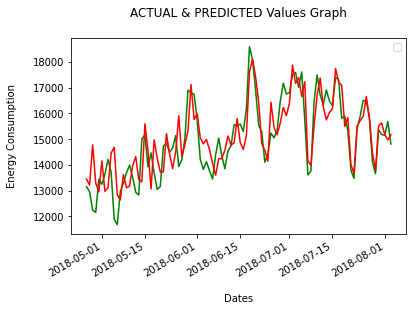

In [26]:
x = dates
y = True_consumption
y1 = Predicted_consumption

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")

# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('\nDates')
plt.ylabel("Energy Consumption\n")
plt.title("ACTUAL & PREDICTED Values Graph\n")
plt.legend()